In [43]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import os

if not os.path.exists("computed_data"):
    os.makedirs("computed_data")

if not os.path.exists("computed_graphics"):
    os.makedirs("computed_graphics")

In [44]:
def clean_strategy_name(name):
    return (name.replace('HoldQQQ', 'QQQ')
                .replace('HoldSP500', 'SPY')
                .replace('BuyAndHold', 'Non-penny Buy & Hold')
                .replace('YouTuberInverse', 'Non-penny Inverse YouTuber')
                .replace('UnclearAsBuy', 'Unclear as Buy')
                .replace('Weighted', ' (Weighted by Conviction)')
                .replace('HighConviction_6Months', 'Non-penny High Conviction (6 Months)')
                .replace('MediumConviction_6Months', 'Non-penny Medium Conviction (6 Months)')
                .replace('LowConviction_6Months', 'Non-penny Low Conviction (6 Months)')
                .replace('_', ' ')
                .replace('6Months', '')
           )

In [45]:
def set_uniform_plot_style(title, legend_title):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.set_title(title, fontsize=33, pad=20)
    ax.set_xlabel('Year', fontsize=30)
    ax.set_ylabel('Portfolio Value ($)', fontsize=30)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.tick_params(axis='x', labelsize=27)
    ax.tick_params(axis='y', labelsize=27)
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}'))
    return fig, ax, legend_title

## Plot Cumulative Returns

1) Make QQQ and SPY to be separate (make line style unique for both of them). Remove legend title.
2) Remove legend title. 

In [46]:
with open("computed_data/Cumulative_Returns_for_100_Investment_Ordered_by_Performance.pkl", "rb") as f:
    analyses_for_first_two_plots = pickle.load(f)

In [47]:
def plot_cumulative_returns(analyses):
    fig, ax, legend_title = set_uniform_plot_style("Portfolio Value for a $100 Investment in each Strategy\n (Non-penny Stock Recommendations only)", "Strategy")
    group_1_strategies = ['BuyAndHold_6Months', 'YouTuberInverse', 'BuyAndHoldWeighted', 'HoldQQQ', 'HoldSP500']
    data = []
    for analysis in analyses:
        if analysis['name'] in group_1_strategies:
            cr = analysis['cumulative_returns'] * 100
            data.append({'name': clean_strategy_name(analysis['name']), 'cumulative_returns': cr, 'final_return': cr.iloc[-1], 'original_name': analysis['name']})
    data.sort(key=lambda x: x['final_return'], reverse=True)
    for d in data:
        color = 'black' if d['original_name'] == 'HoldQQQ' else None  # Set 'HoldQQQ' line to black, others default
        ax.plot(d['cumulative_returns'].index, d['cumulative_returns'].values, label=d['name'], linewidth=3, color=color)
        #ax.plot(d['cumulative_returns'].index, d['cumulative_returns'].values, label=d['name'], linewidth=3)
    ax.legend(title=None, fontsize=16, loc='upper left', title_fontsize=24)
    fig.tight_layout()
    fig.savefig("computed_graphics/Cumulative_Returns_for_100_Investment_Ordered_by_Performance.png", dpi=300, bbox_inches='tight')
    plt.show()

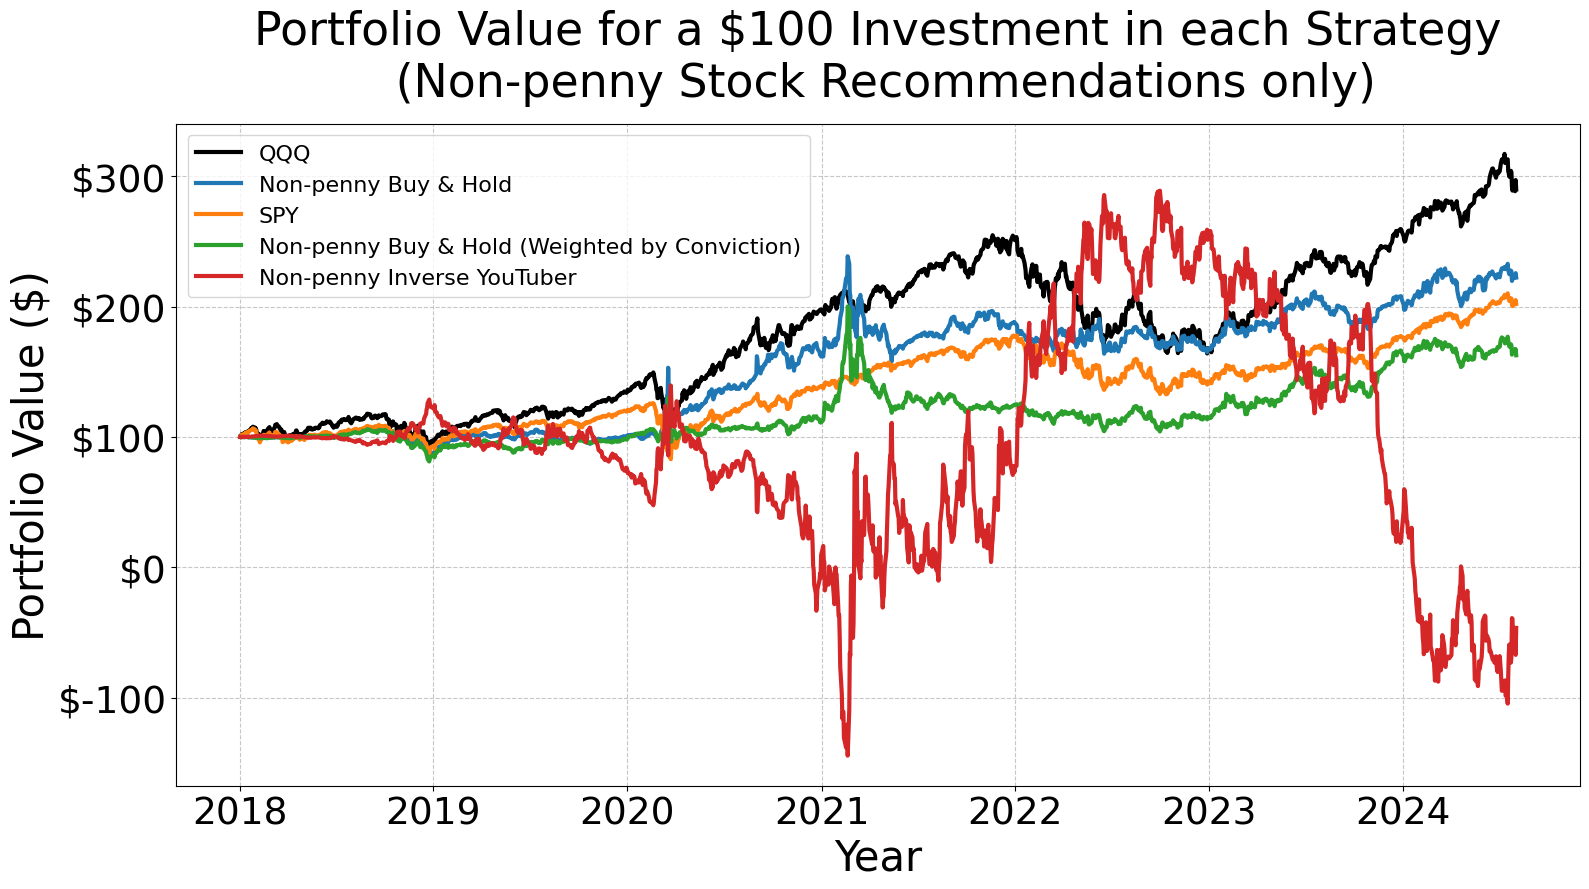

In [48]:
plot_cumulative_returns(analyses_for_first_two_plots)

## Buy and Hold Time Period

In [49]:

"""
def plot_buy_and_hold(analyses):
    fig, ax, legend_title = set_uniform_plot_style("Buy & Hold Strategies for $100 Investment", "Strategy")
    group_2_strategies = ['BuyAndHold_6Months', 'BuyAndHold_1Year', 'BuyAndHold_2Years', 'BuyAndHold_5Years', 'BuyAndHold_10Years', 'BuyAndHoldWeighted']
    data = []
    for analysis in analyses:
        if analysis['name'] in group_2_strategies:
            cr = analysis['cumulative_returns'] * 100
            data.append({'name': clean_strategy_name(analysis['name']), 'cumulative_returns': cr, 'final_return': cr.iloc[-1]})
    data.sort(key=lambda x: x['final_return'], reverse=True)
    for d in data:
        ax.plot(d['cumulative_returns'].index, d['cumulative_returns'].values, label=d['name'], linewidth=3)
    ax.legend(title=legend_title, fontsize=23, loc='upper left', title_fontsize=24)
    fig.tight_layout()
    fig.savefig("computed_graphics/Buy_Hold_Strategies_for_$100_Investment.png", dpi=300, bbox_inches='tight')
    plt.show()
"""

'\ndef plot_buy_and_hold(analyses):\n    fig, ax, legend_title = set_uniform_plot_style("Buy & Hold Strategies for $100 Investment", "Strategy")\n    group_2_strategies = [\'BuyAndHold_6Months\', \'BuyAndHold_1Year\', \'BuyAndHold_2Years\', \'BuyAndHold_5Years\', \'BuyAndHold_10Years\', \'BuyAndHoldWeighted\']\n    data = []\n    for analysis in analyses:\n        if analysis[\'name\'] in group_2_strategies:\n            cr = analysis[\'cumulative_returns\'] * 100\n            data.append({\'name\': clean_strategy_name(analysis[\'name\']), \'cumulative_returns\': cr, \'final_return\': cr.iloc[-1]})\n    data.sort(key=lambda x: x[\'final_return\'], reverse=True)\n    for d in data:\n        ax.plot(d[\'cumulative_returns\'].index, d[\'cumulative_returns\'].values, label=d[\'name\'], linewidth=3)\n    ax.legend(title=legend_title, fontsize=23, loc=\'upper left\', title_fontsize=24)\n    fig.tight_layout()\n    fig.savefig("computed_graphics/Buy_Hold_Strategies_for_$100_Investment.png", d

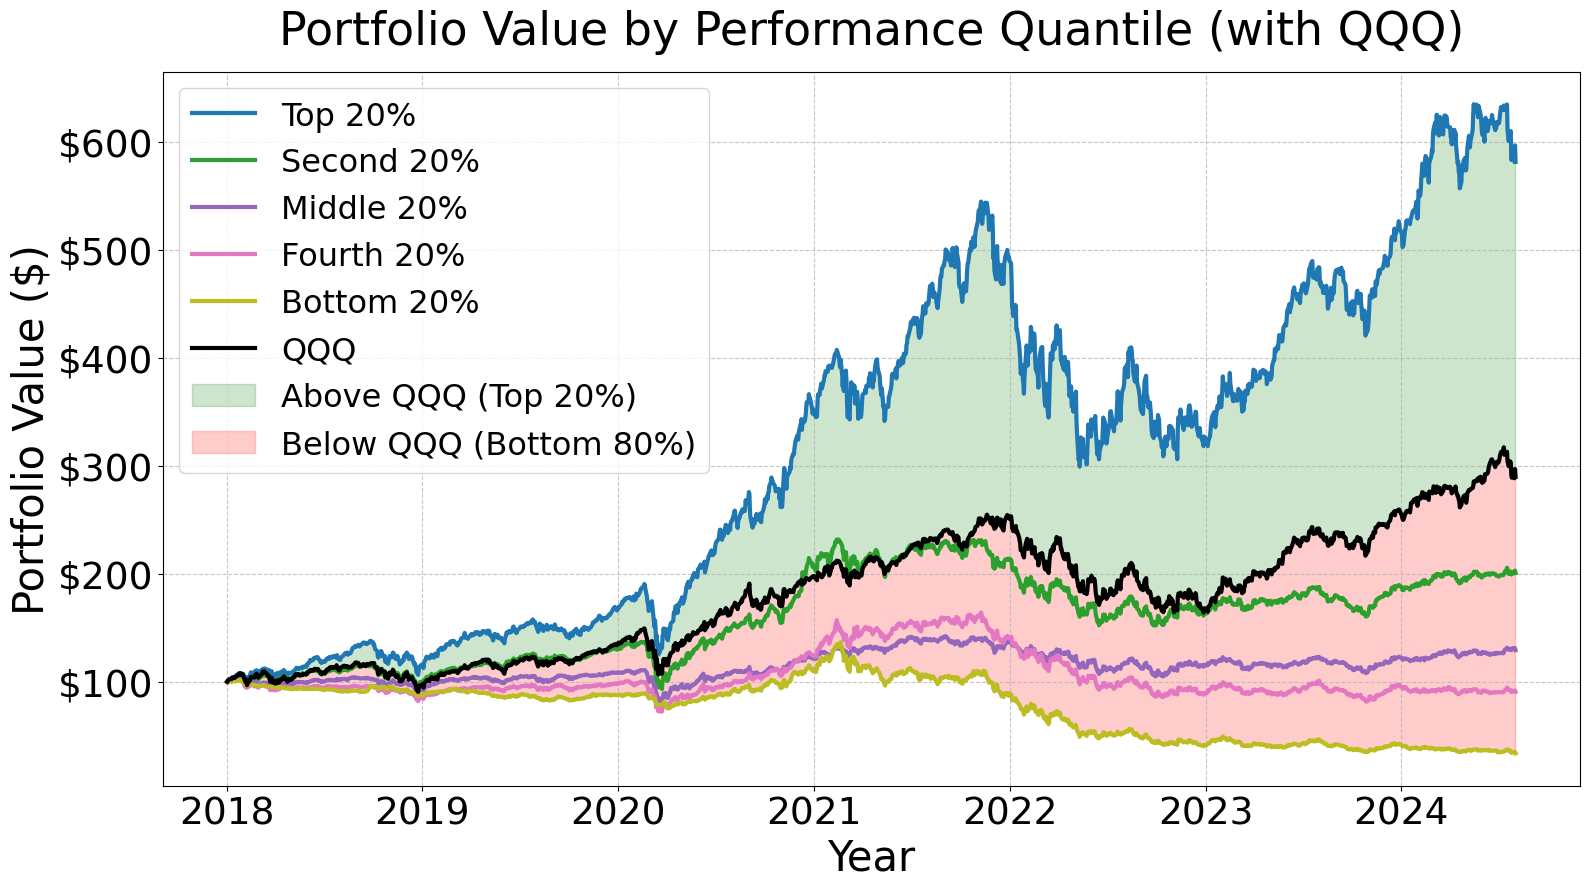

In [50]:
with open("computed_data/Cumulative_Returns_by_Performance_Quintile_With_HoldQQQ.pkl", "rb") as f:
    quintile_data = pickle.load(f)

prices = quintile_data['prices']
returns = quintile_data['returns']
cumulative_returns = quintile_data['cumulative_returns']
final_cumulative_returns = quintile_data['final_cumulative_returns']
quantile_groups = quintile_data['quantile_groups']
group_means = quintile_data['group_means']
final_group_returns = quintile_data['final_group_returns']
hold_qqq_cumulative_returns = quintile_data['hold_qqq_cumulative_returns']
hold_qqq_final = quintile_data['hold_qqq_final']
sorted_items = quintile_data['sorted_items']

fig, ax, legend_title = set_uniform_plot_style("Portfolio Value by Performance Quantile (with QQQ)", "Quantile Group")
items_sorted = sorted([(k, v) for k, v in final_group_returns.items() if k not in ["Above QQQ (Top 20%)", "Below QQQ (Bottom 80%)"]], key=lambda x: x[1], reverse=True)
colors = plt.cm.tab10(np.linspace(0, 1, len(items_sorted)))
i = 0
for label, val in items_sorted:
    if label != "HoldQQQ":
        ax.plot(group_means[label].index, group_means[label] + 100, label=label, linewidth=3, color=colors[i])
        i += 1
ax.plot(hold_qqq_cumulative_returns.index, hold_qqq_cumulative_returns.values * 100, label="QQQ", color="black", linewidth=3)
top_20 = group_means["Top 20%"] + 100
bottom_20 = group_means["Bottom 20%"] + 100
ax.fill_between(top_20.index, hold_qqq_cumulative_returns.values * 100, top_20, where=(top_20 > hold_qqq_cumulative_returns.values * 100), color='green', alpha=0.2, label="Above QQQ (Top 20%)")
ax.fill_between(bottom_20.index, hold_qqq_cumulative_returns.values * 100, bottom_20, where=(bottom_20 < hold_qqq_cumulative_returns.values * 100), color='red', alpha=0.2, label="Below QQQ (Bottom 80%)")
handles, labels = ax.get_legend_handles_labels()
sorted_hl = sorted(zip(handles, labels), key=lambda x: final_group_returns.get(x[1], -np.inf), reverse=True)
sh, sl = zip(*sorted_hl)
ax.legend(sh, sl, title=None, fontsize=23, loc='upper left', title_fontsize=24)
fig.tight_layout()
fig.savefig("computed_graphics/Cumulative_Returns_by_Performance_Quintile_With_HoldQQQ.png", dpi=300, bbox_inches='tight')
plt.show()


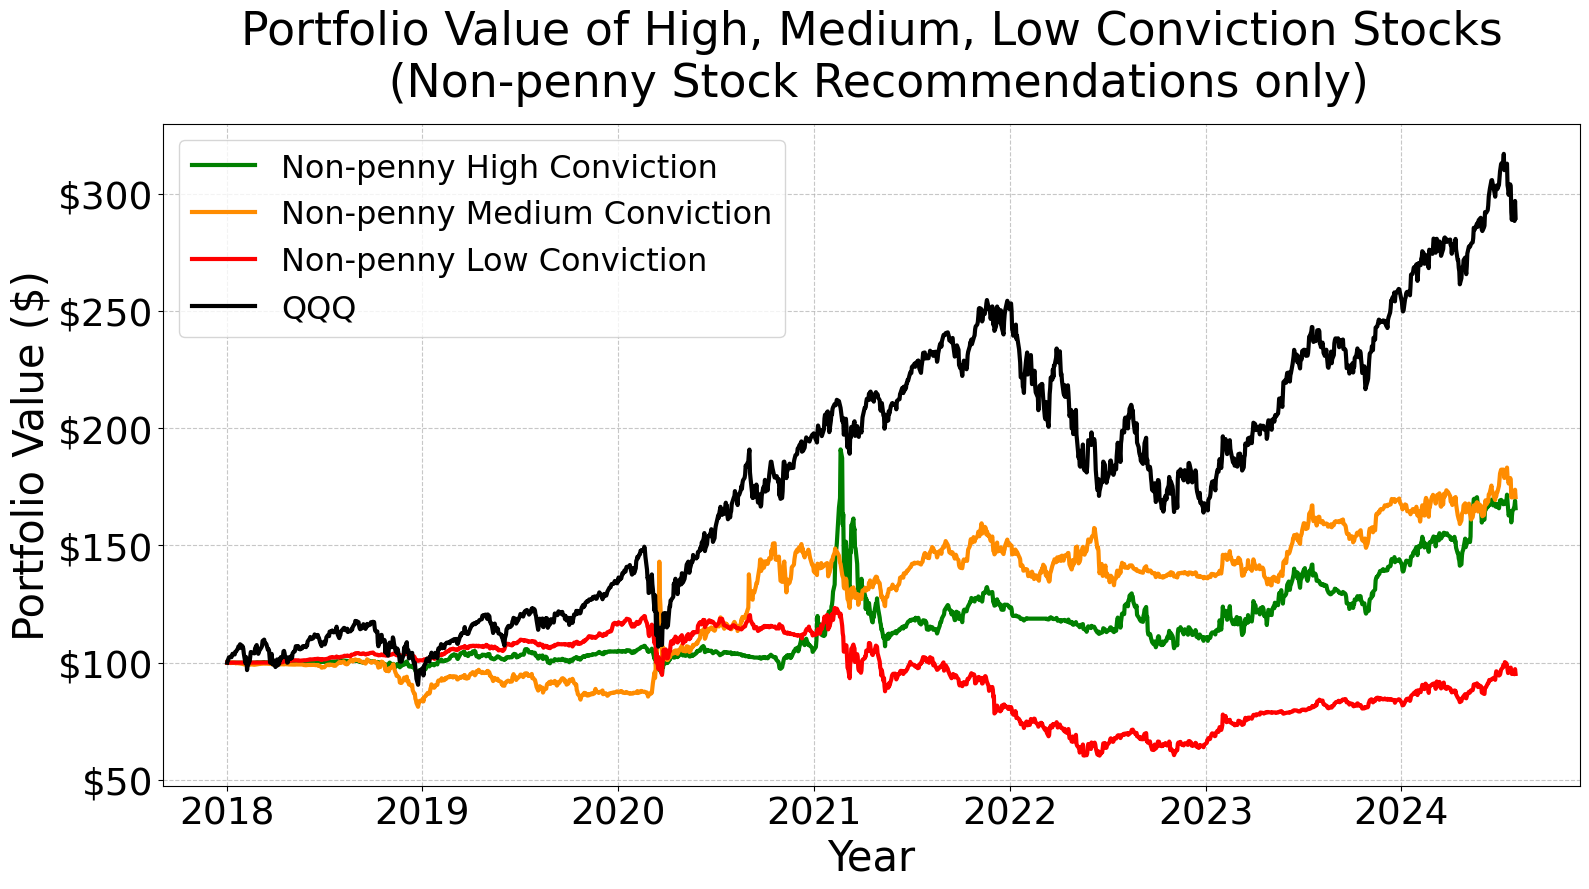

In [51]:
with open("computed_data/Cumulative_Returns_High_Medium_Low_Conviction_Buckets_6Month_Hold.pkl", "rb") as f:
    conviction_data = pickle.load(f)
conviction_analyses = conviction_data["analyses"]

fig, ax, legend_title = set_uniform_plot_style("Portfolio Value of High, Medium, Low Conviction Stocks\n (Non-penny Stock Recommendations only)", "Conviction")

for a in conviction_analyses:
    cr = a["cumulative_returns"]
    if cr.iloc[0] < 10:
        cr = cr * 100
    name = clean_strategy_name(a["name"]).replace(" (6 Months)", "")
    
    if "High Conviction" in name:
        color = "green"
    elif "Low Conviction" in name:
        color = "red"
    else:
        color = "darkorange"
    
    ax.plot(cr.index, cr.values, label=name, linewidth=3, color=color)

qqq_cr = hold_qqq_cumulative_returns.copy()
if qqq_cr.iloc[0] < 10:
    qqq_cr *= 100

ax.plot(qqq_cr.index, qqq_cr.values, label="QQQ", linewidth=3, color='black')

ax.legend(title=None, fontsize=23, loc='upper left', title_fontsize=24)
fig.tight_layout()
fig.savefig("computed_graphics/Cumulative_Returns_High_Medium_Low_Conviction_Stocks.png", dpi=300, bbox_inches='tight')
plt.show()